## Simple Perceptron


In [288]:
n = 50 #how many dimensions a p has
import numpy as np


In [289]:
def converged(inputs,targets,weights):
    update = []
    for inp,tar in zip(inputs,targets):
        z = np.multiply(inp,tar)
        up = np.dot(-weights.T,z)
        up = np.where(up>=0,1,0)
        update.append(up)
    return np.array(update)

In [386]:
def train_predict(inputs,targets,weights):
    steps = 0
    update = np.ones(inputs.shape[0])
    while steps < 4000 and update.any() > 0:
        update = converged(inputs,targets,weights)
        weights = weights + 0.1 * np.dot(update, np.multiply(inputs.T,targets).T)
        steps +=1
    return update, steps, weights

In [387]:
ps = np.arange(20,150,20)

In [388]:
def make_data(p,n):
    inputs = []
    targets = []
    for i in range(p):
        vector = np.sign(np.random.choice([-1,1],size=n))
        target = np.random.choice([-1,1],size=p)
        inputs.append(vector)
        targets.append(target[0])
    weights = np.full(50,0.0)
    return np.array(inputs), np.array(targets), weights

In [389]:
def evaluate(inputs,weights):
    outputs = []
    for i in inputs:
        outputs.append(np.sign(np.dot(i,weights)))
    return np.array(outputs)

In [397]:
works = []
for p in ps: 
    correct = 0
    print(p)
    for i in range(0,10):
        inputs, targets, weights = make_data(p,n)
        update, steps, weights= train_predict(inputs,targets,weights)
        outputs = evaluate(inputs,weights)
        if (outputs == targets).all():
        #if update.all() == 0:
            correct +=1
    works.append(correct)

20
40
60
80
100
120
140


In [398]:
print(works)

[10, 10, 10, 9, 3, 1, 0]


In [399]:
import matplotlib.pyplot as plt

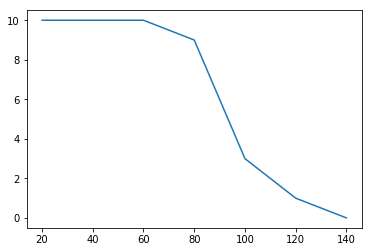

In [400]:
plt.plot(ps,works)
plt.show()